# Project Intro

Rectently, animes are becoming more and more popular since some amazing anime movies came out. This interests us to do some analysis and modeling on people who are watching animes.

The dataset comes from Kaggle [MyAnimeList Dataset](https://www.kaggle.com/azathoth42/myanimelist).

There are three datasets in it:


*   `UserList` - contains all user data, i.e. username, age, gender.
*   `AnimeList` - contains all anime data, i.e. anime name, studio, genre
*   `UserAnimeList` - contains scores given by users to animes and other user scoring statistics



**This notebook focus on UserList.**

# Data loading

Getting user_data from google drive

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import seaborn as sb
import datetime
import time
import numpy as np
import matplotlib.pyplot as plt
import plotly as py
import plotly.express as px
from plotly.offline import iplot
import plotly.graph_objs as go
from plotly.subplots import make_subplots

Mounted at /content/gdrive


In [ ]:
path = "/content/gdrive/Shareddrives/545 Project"
os.chdir(path)
os.listdir(path)


['spark-3.0.1-bin-hadoop3.2.tgz.1',
 'spark-3.0.1-bin-hadoop3.2.tgz.2',
 'AnimeList.csv',
 'spark-3.0.1-bin-hadoop3.2.tgz',
 'spark-3.0.1-bin-hadoop3.2',
 'UserList.csv',
 'spark-3.0.1-bin-hadoop3.2.tgz.3',
 'UserAnimeList.csv',
 'UserAnime_cleaned.csv',
 'user_list_filtered.csv',
 'User_Anime_Full.csv',
 'User_Anime_Fuill_r.csv',
 'User_Anime_Full_r.csv',
 'Notebook',
 'user_full.csv',
 'Anime_cleaned.csv',
 'user_anime_full_100k.csv']

In [ ]:
# Load data
User_data = pd.read_csv('UserList.csv', header=[0], encoding='utf-8')

In [ ]:
User_data

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,karthiga,2255153,3,49,1,0,0,55.31,Female,"Chennai, India",1990-04-29,NaN,2013-03-03,2014-02-04 01:32:00,7.43,0.0,3391.0
1,RedvelvetDaisuki,1897606,61,396,39,0,206,118.07,Female,Manila,1995-01-01,NaN,2012-12-13,1900-05-13 02:47:00,6.78,80.0,7094.0
2,Damonashu,37326,45,195,27,25,59,83.70,Male,"Detroit,Michigan",1991-08-01,NaN,2008-02-13,1900-03-24 12:48:00,6.15,6.0,4936.0
3,bskai,228342,25,414,2,5,11,167.16,Male,"Nayarit, Mexico",1990-12-14,NaN,2009-08-31,2014-05-12 16:35:00,8.27,1.0,10081.0
4,shuzzable,2347781,36,72,16,2,25,35.48,NaN,NaN,NaN,NaN,2013-03-25,2015-09-09 21:54:00,9.06,7.0,2154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302670,ScruffyPuffy,3119025,0,27,0,0,0,7.92,NaN,NaN,NaN,NaN,2013-09-06,2014-10-10 09:04:00,0.00,0.0,477.0
302671,Torasori,3975907,22,239,0,4,176,86.88,Male,"Latvia, Riga",1998-11-18,NaN,2014-07-30,2018-05-24 21:34:46,8.98,47.0,5313.0
302672,onpc,1268417,5,169,2,5,24,38.36,Male,NaN,NaN,NaN,2012-04-23,2016-12-28 14:35:00,7.72,0.0,2280.0
302673,HMicca,1289601,11,73,2,2,16,119.97,Female,"Birmingham, England",1995-08-12,NaN,2012-05-05,2012-11-15 08:10:00,8.89,11.0,7049.0


# Data cleaning and filtering

In this section, the imported data will be cleaned and filtered. NaN value, duplicates and irrelevant columns are dropped. A new column 'user_age' is added and data is filtered based on 'user_age'. Also the user_days_spent_watching has some extreme values, they are filtered too.

In [ ]:
# Check how many null values in the data set
User_data.isnull().cumsum()

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,1,1,5,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302670,1,0,0,0,0,0,0,0,84875,145899,133924,302671,129,129,129,129,129
302671,1,0,0,0,0,0,0,0,84875,145899,133924,302672,129,129,129,129,129
302672,1,0,0,0,0,0,0,0,84875,145900,133925,302673,129,129,129,129,129
302673,1,0,0,0,0,0,0,0,84875,145900,133925,302674,129,129,129,129,129


Notice that there are one column `access_rank` that only contains NaN value. Drop this column.

In [ ]:
User_data.drop('access_rank',inplace=True, axis=1)
User_data

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,karthiga,2255153,3,49,1,0,0,55.31,Female,"Chennai, India",1990-04-29,2013-03-03,2014-02-04 01:32:00,7.43,0.0,3391.0
1,RedvelvetDaisuki,1897606,61,396,39,0,206,118.07,Female,Manila,1995-01-01,2012-12-13,1900-05-13 02:47:00,6.78,80.0,7094.0
2,Damonashu,37326,45,195,27,25,59,83.70,Male,"Detroit,Michigan",1991-08-01,2008-02-13,1900-03-24 12:48:00,6.15,6.0,4936.0
3,bskai,228342,25,414,2,5,11,167.16,Male,"Nayarit, Mexico",1990-12-14,2009-08-31,2014-05-12 16:35:00,8.27,1.0,10081.0
4,shuzzable,2347781,36,72,16,2,25,35.48,NaN,NaN,NaN,2013-03-25,2015-09-09 21:54:00,9.06,7.0,2154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302670,ScruffyPuffy,3119025,0,27,0,0,0,7.92,NaN,NaN,NaN,2013-09-06,2014-10-10 09:04:00,0.00,0.0,477.0
302671,Torasori,3975907,22,239,0,4,176,86.88,Male,"Latvia, Riga",1998-11-18,2014-07-30,2018-05-24 21:34:46,8.98,47.0,5313.0
302672,onpc,1268417,5,169,2,5,24,38.36,Male,NaN,NaN,2012-04-23,2016-12-28 14:35:00,7.72,0.0,2280.0
302673,HMicca,1289601,11,73,2,2,16,119.97,Female,"Birmingham, England",1995-08-12,2012-05-05,2012-11-15 08:10:00,8.89,11.0,7049.0


Drop records containing NaN and drop duplicates in data

In [ ]:
User_data.dropna(inplace=True)
User_data.drop_duplicates(inplace=True)
User_data

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,karthiga,2255153,3,49,1,0,0,55.31,Female,"Chennai, India",1990-04-29,2013-03-03,2014-02-04 01:32:00,7.43,0.0,3391.0
1,RedvelvetDaisuki,1897606,61,396,39,0,206,118.07,Female,Manila,1995-01-01,2012-12-13,1900-05-13 02:47:00,6.78,80.0,7094.0
2,Damonashu,37326,45,195,27,25,59,83.70,Male,"Detroit,Michigan",1991-08-01,2008-02-13,1900-03-24 12:48:00,6.15,6.0,4936.0
3,bskai,228342,25,414,2,5,11,167.16,Male,"Nayarit, Mexico",1990-12-14,2009-08-31,2014-05-12 16:35:00,8.27,1.0,10081.0
5,terune_uzumaki,327311,5,5,0,0,0,15.20,Female,"Malaysia, Kuantan",1998-08-24,2010-05-10,2012-10-18 19:06:00,9.70,6.0,920.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302652,bumcakee,1396285,13,116,5,9,22,49.87,Female,"nhollywood, california",1998-07-18,2012-07-14,2017-02-14 00:30:00,8.86,24.0,3027.0
302655,ammaretto,381078,0,1,1,0,0,0.49,Male,"Russia, Novokuznetsk",1990-08-02,2010-09-09,2015-06-03 10:59:00,8.00,0.0,27.0
302657,Scarlet95,2478991,6,103,10,8,54,47.94,Female,Belgium,1995-10-17,2013-04-24,2016-12-18 08:41:00,7.40,1.0,2906.0
302671,Torasori,3975907,22,239,0,4,176,86.88,Male,"Latvia, Riga",1998-11-18,2014-07-30,2018-05-24 21:34:46,8.98,47.0,5313.0


Drop irrelevant columns `last_online`

In [ ]:
User_data.drop('last_online', axis=1, inplace=True)
User_data

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,join_date,stats_mean_score,stats_rewatched,stats_episodes
0,karthiga,2255153,3,49,1,0,0,55.31,Female,"Chennai, India",1990-04-29,2013-03-03,7.43,0.0,3391.0
1,RedvelvetDaisuki,1897606,61,396,39,0,206,118.07,Female,Manila,1995-01-01,2012-12-13,6.78,80.0,7094.0
2,Damonashu,37326,45,195,27,25,59,83.70,Male,"Detroit,Michigan",1991-08-01,2008-02-13,6.15,6.0,4936.0
3,bskai,228342,25,414,2,5,11,167.16,Male,"Nayarit, Mexico",1990-12-14,2009-08-31,8.27,1.0,10081.0
5,terune_uzumaki,327311,5,5,0,0,0,15.20,Female,"Malaysia, Kuantan",1998-08-24,2010-05-10,9.70,6.0,920.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302652,bumcakee,1396285,13,116,5,9,22,49.87,Female,"nhollywood, california",1998-07-18,2012-07-14,8.86,24.0,3027.0
302655,ammaretto,381078,0,1,1,0,0,0.49,Male,"Russia, Novokuznetsk",1990-08-02,2010-09-09,8.00,0.0,27.0
302657,Scarlet95,2478991,6,103,10,8,54,47.94,Female,Belgium,1995-10-17,2013-04-24,7.40,1.0,2906.0
302671,Torasori,3975907,22,239,0,4,176,86.88,Male,"Latvia, Riga",1998-11-18,2014-07-30,8.98,47.0,5313.0


In [ ]:
User_data_clean = User_data

Calculating the age of user when they join MyAnimeList.net and add column "age_of_joining"to dataset.

*Age is calculated based on year `approximately` but not the exact date

In [ ]:
# Converting date data to date_time.
User_data_clean['birth_date'] = pd.to_datetime(User_data_clean.birth_date, format="%Y-%m-%d",errors="coerce")
User_data_clean['join_date'] = pd.to_datetime(User_data_clean.join_date, format="%Y-%m-%d",errors="coerce")
User_data_clean.drop(index=User_data_clean[User_data_clean.birth_date.isnull()].index, inplace=True)
User_data_clean['age_of_joining'] = User_data_clean.join_date.dt.year - User_data_clean.birth_date.dt.year
User_data_clean['age_of_joining'].astype('int')

0         23
1         17
2         17
3         19
5         12
          ..
302652    14
302655    20
302657    18
302671    16
302673    17
Name: age_of_joining, Length: 119622, dtype: int64

Calculating the age of users by the begining of 2019

In [ ]:
User_data_clean['user_age'] = 2019 - User_data_clean.birth_date.dt.year
User_data_clean['user_age'].astype('int')

0         29
1         24
2         28
3         29
5         21
          ..
302652    21
302655    29
302657    24
302671    21
302673    24
Name: user_age, Length: 119622, dtype: int64

Filter data:

1. Filter age_of_joint between 6 and 55
2. Filter user_age between 6 and 55 
3. Filter user_days_spent_watching larger than 5000 days

In [ ]:
# filter age of joint and user_age
User_data_filtered = User_data_clean[User_data_clean['age_of_joining'] >= 6]
User_data_filtered = User_data_filtered[User_data_filtered['age_of_joining'] <= 55]
User_data_filtered = User_data_filtered[User_data_filtered['user_age'] >= 6]
User_data_filtered = User_data_filtered[User_data_filtered['user_age'] <= 55]
User_data_filtered

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,join_date,stats_mean_score,stats_rewatched,stats_episodes,age_of_joining,user_age
0,karthiga,2255153,3,49,1,0,0,55.31,Female,"Chennai, India",1990-04-29,2013-03-03,7.43,0.0,3391.0,23,29
1,RedvelvetDaisuki,1897606,61,396,39,0,206,118.07,Female,Manila,1995-01-01,2012-12-13,6.78,80.0,7094.0,17,24
2,Damonashu,37326,45,195,27,25,59,83.70,Male,"Detroit,Michigan",1991-08-01,2008-02-13,6.15,6.0,4936.0,17,28
3,bskai,228342,25,414,2,5,11,167.16,Male,"Nayarit, Mexico",1990-12-14,2009-08-31,8.27,1.0,10081.0,19,29
5,terune_uzumaki,327311,5,5,0,0,0,15.20,Female,"Malaysia, Kuantan",1998-08-24,2010-05-10,9.70,6.0,920.0,12,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302652,bumcakee,1396285,13,116,5,9,22,49.87,Female,"nhollywood, california",1998-07-18,2012-07-14,8.86,24.0,3027.0,14,21
302655,ammaretto,381078,0,1,1,0,0,0.49,Male,"Russia, Novokuznetsk",1990-08-02,2010-09-09,8.00,0.0,27.0,20,29
302657,Scarlet95,2478991,6,103,10,8,54,47.94,Female,Belgium,1995-10-17,2013-04-24,7.40,1.0,2906.0,18,24
302671,Torasori,3975907,22,239,0,4,176,86.88,Male,"Latvia, Riga",1998-11-18,2014-07-30,8.98,47.0,5313.0,16,21


In [ ]:
User_data_filtered = User_data_filtered[User_data_filtered['user_days_spent_watching'] <= 5000]
User_data_filtered

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,join_date,stats_mean_score,stats_rewatched,stats_episodes,age_of_joining,user_age
0,karthiga,2255153,3,49,1,0,0,55.31,Female,"Chennai, India",1990-04-29,2013-03-03,7.43,0.0,3391.0,23,29
1,RedvelvetDaisuki,1897606,61,396,39,0,206,118.07,Female,Manila,1995-01-01,2012-12-13,6.78,80.0,7094.0,17,24
2,Damonashu,37326,45,195,27,25,59,83.70,Male,"Detroit,Michigan",1991-08-01,2008-02-13,6.15,6.0,4936.0,17,28
3,bskai,228342,25,414,2,5,11,167.16,Male,"Nayarit, Mexico",1990-12-14,2009-08-31,8.27,1.0,10081.0,19,29
5,terune_uzumaki,327311,5,5,0,0,0,15.20,Female,"Malaysia, Kuantan",1998-08-24,2010-05-10,9.70,6.0,920.0,12,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302652,bumcakee,1396285,13,116,5,9,22,49.87,Female,"nhollywood, california",1998-07-18,2012-07-14,8.86,24.0,3027.0,14,21
302655,ammaretto,381078,0,1,1,0,0,0.49,Male,"Russia, Novokuznetsk",1990-08-02,2010-09-09,8.00,0.0,27.0,20,29
302657,Scarlet95,2478991,6,103,10,8,54,47.94,Female,Belgium,1995-10-17,2013-04-24,7.40,1.0,2906.0,18,24
302671,Torasori,3975907,22,239,0,4,176,86.88,Male,"Latvia, Riga",1998-11-18,2014-07-30,8.98,47.0,5313.0,16,21


After cleaning and filtering, there are still 100k records with 17 features. This is enough for this project

Store data on drive

In [ ]:
# User_data_filtered.to_csv('user_list_filtered.csv')
# !cp user_list_filtered.csv /content/gdrive/Shareddrives/545\ Project/

# Data visualization

In this part, several user features (`gender`, `age`, `join_year`) are visualized. Although some of them are not going to be used in the following modeling, it is an interesting to try to visualize the data and see how it distributes.

In [ ]:
# set style of figures
sb.set_style("white")

## Distributions of user gender

In [ ]:
gender = User_data_filtered.groupby('gender').count()
gender

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,location,birth_date,join_date,stats_mean_score,stats_rewatched,stats_episodes,age_of_joining,user_age
gender,,,,,,,,,,,,,,,,
Female,41356,41356,41356,41356,41356,41356,41356,41356,41356,41356,41356,41356,41356,41356,41356,41356
Male,76443,76443,76443,76443,76443,76443,76443,76443,76443,76443,76443,76443,76443,76443,76443,76443
Non-Binary,549,549,549,549,549,549,549,549,549,549,549,549,549,549,549,549


In [ ]:
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "xy"}, {"type": "domain"}]])
fig.add_trace(go.Bar(x=gender.index, 
            y=gender.user_id,
            text=gender.user_id,
            name="Number of Gender",
            showlegend=False), 
            row=1, col=1)
fig.add_trace(go.Pie(labels=gender.index, 
            values=gender.user_id,
            text=gender.index),
              row=1, col=2)
fig.update_layout(width=800, title_text="Distribution of Gender")
fig.update_xaxes(title='Year', row=1, col=1)
fig.update_yaxes(title='Count', row=1, col=1)
fig.show()

From the figures above, there are Female, male and non-binary users on this site and `most of the users are male`, whilch `may cause imbalance` in training data afterwards

## Distribution of user age

Extract user_age and user_id from dataset

In [ ]:
age_dist =  User_data_filtered.groupby('user_age')[['user_id']].count()
age_dist.rename(columns={'user_id': 'count'},inplace=True)
age_dist.reset_index(inplace=True)
age_dist.sort_index(inplace=True)

In [ ]:
# Define a function to category users based on age group, which will make the figure clearer
def age_cate(age):
  if age in range(5, 21):
    return "5-20"
  elif age in range(21, 31):
    return "21-30"
  elif age in range(31, 41):
    return "31-40"
  elif age in range(41, 51):
    return "41-50"
  return "50-55"
age_dist['age_group'] = age_dist['user_age'].apply(lambda x: age_cate(x))
age_group_dist = age_dist.groupby('age_group').sum('count')

In [ ]:
age_group_dist = age_group_dist.reset_index()[['age_group', 'count']]

In [ ]:
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "xy"}, {"type": "domain"}]])
fig.add_trace(go.Bar(x=age_dist.user_age, 
            y=age_dist['count'],
            text=age_dist['count'],
            name="# of user",
            showlegend=False), 
            row=1, col=1)
fig.add_trace(go.Pie(labels=age_group_dist.age_group, 
            values=age_group_dist['count'], sort=False,
            textinfo="label+percent", 
            name="Percent"),
              row=1, col=2)
fig.update_layout(width=1200, height=800, title_text="Distribution of User Age")
fig.update_xaxes(title='Age', row=1, col=1)
fig.update_yaxes(title='Count', row=1, col=1)
fig.show()

From the figures above, most of the users are in the age 21-30. Then it may not be a good idea to model based on ages, or the data needs to be resampled to be balanced

## Join year

In [ ]:
join_year = User_data_filtered[['user_id', 'join_date']]
join_year['join_year'] = join_year['join_date'].apply(lambda x: x.year)
join_year = join_year.groupby('join_year').count()
join_year.reset_index(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "xy"}, {"type": "domain"}]])
fig.add_trace(go.Bar(x=join_year.join_year, 
            y=join_year.user_id,
            text=join_year.user_id,
            textposition='outside',
            outsidetextfont={'size':10, 'color':' gray'},
            name="# of user",
            showlegend=False), 
            row=1, col=1)
fig.add_trace(go.Pie(labels=join_year.join_year, 
            values=join_year.user_id,
            textinfo="label+percent", 
            name="Percent",
            sort=False),
            row=1, col=2)
fig.update_layout(width=1300, height=600, title_text="Distribution of Join Year")
fig.update_xaxes(dtick=1, tickangle=-30, title='Year', row=1, col=1)
fig.update_yaxes(title='Count', row=1, col=1)
fig.show()

The figure can also be translated as how many new users every year.

From the figure above, most of the users joined the site between 2008 and 2014. After 2014 new user become less and less.

Since the trend is obvious that **the number of new users are decreasing each year**, there is no need to build models on this features.

## Overall User Group Analysis

After finishing the visualization above, here is a figure that integrates all the information from the above figures.

In [ ]:
User_data_filtered_c = User_data_filtered
User_data_filtered_c['join_year'] = User_data_filtered_c['join_date'].apply(lambda x: x.year)
User_overall_dist = User_data_filtered_c.groupby(by=['join_year','user_age', 'gender'])[['username']].count().rename(columns={"username":'count'}).reset_index()
User_overall_dist['age_group'] = User_overall_dist['user_age'].apply(lambda x: age_cate(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.box(User_overall_dist, x="join_year", y="user_age", color="gender")
fig.update_xaxes(dtick=1)
fig.show()

**The following sections are done out of interests, they can be skipped if are not wanted** 

Then please go to 545_Project_AnimeList.ipynb

## User_completed anime

In [ ]:
User_data_filtered.user_completed.max()

10138

In [ ]:
User_data_filtered.user_completed.min()

0

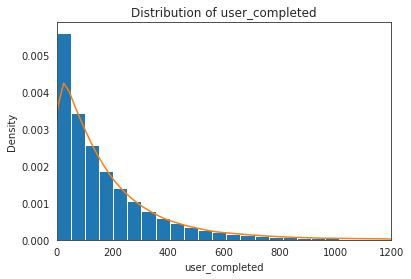

In [ ]:
User_data_filtered['user_completed'].plot(kind='hist', bins=200, density=True)
User_data_filtered['user_completed'].plot(kind='kde')
plt.xlabel("user_completed")
plt.title("Distribution of user_completed")
plt.xlim((0, 1200))
plt.show()

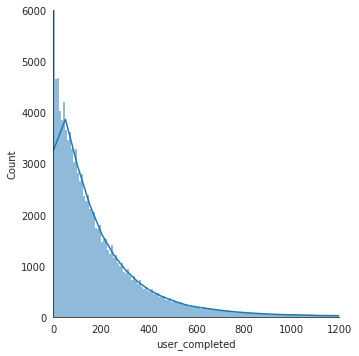

In [ ]:
hist_completed = sb.displot(data=User_data_filtered, x="user_completed", kind='hist', kde=True)
hist_completed.set(xlim=(0, 1200))
hist_completed.set(ylim=(0, 6000))

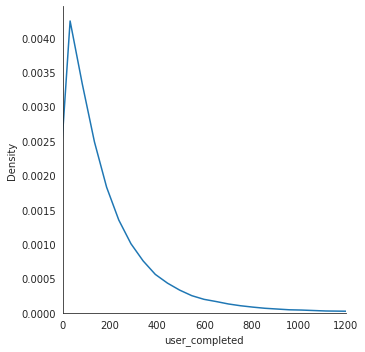

In [ ]:
distr_completed = sb.displot(data=User_data_filtered, x="user_completed", kind='kde')
distr_completed.set(xlim=(0, 1200))

From figures above, it is shown that most of the user completed less than 100 anime.

## Days spent

In [ ]:
User_data_filtered.user_days_spent_watching.max()

4439.88

In [ ]:
User_data_filtered.user_days_spent_watching.min()

0.0

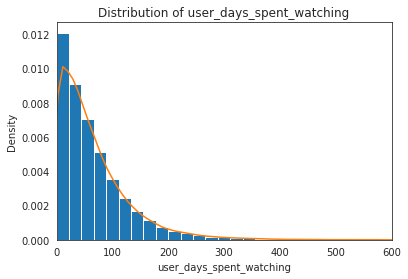

In [ ]:
User_data_filtered['user_days_spent_watching'].plot(kind='hist', bins=200, density=True)
User_data_filtered['user_days_spent_watching'].plot(kind='kde')
plt.xlabel("user_days_spent_watching")
plt.title("Distribution of user_days_spent_watching")
plt.xlim((0, 600))
plt.show()

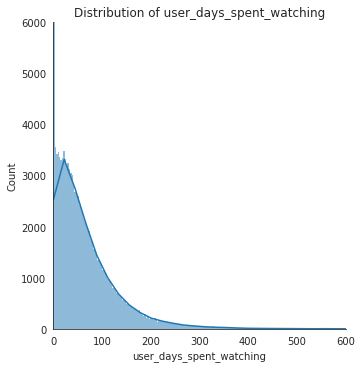

In [ ]:
days_spent = sb.displot(data=User_data_filtered, x="user_days_spent_watching", kind='hist', kde=True)
plt.xlabel("user_days_spent_watching")
plt.title("Distribution of user_days_spent_watching")
days_spent.set(xlim=(0, 600))
days_spent.set(ylim=(0, 6000))

From the figures above, most of the users have spent less than 100 days watching animes.

## Birth year

In [ ]:
# Extract birth year from birth date
birth_year = User_data_filtered[['user_id', 'birth_date']]
birth_year['birth_year'] = birth_year['birth_date'].apply(lambda x: x.year)
birth_year = birth_year.groupby('birth_year').count()
birth_year.reset_index(inplace=True)
birth_year

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,birth_year,user_id,birth_date
0,1964,8,8
1,1965,17,17
2,1966,29,29
3,1967,18,18
4,1968,25,25
5,1969,65,65
6,1970,41,41
7,1971,39,39
8,1972,52,52
9,1973,67,67


In [ ]:
def birth_year_cate(year):
  if year in range(1981, 1986):
    return "1981-1985"
  elif year in range(1986, 1991):
    return "1986-1990"
  elif year in range(1991, 1996):
    return "1991-1995"
  elif year in range(1996, 2001):
    return "1996-2000"
  elif year in range(1991, 2003):
    return "2001-2002"
  return ("Before 1980")
birth_year['birth_group'] = birth_year['birth_year'].apply(lambda x: birth_year_cate(x))
birth_year_group = birth_year.groupby('birth_group').sum('user_id')
birth_year_group = birth_year_group.reset_index()[['birth_group', 'user_id']].rename(columns={"user_id":'count'})

In [ ]:
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "xy"}, {"type": "domain"}]])
fig.add_trace(go.Bar(x=birth_year.birth_year, 
            y=birth_year.user_id,
            name="(Year, Count)",
            showlegend=False), 
            row=1, col=1)
# fig.add_trace(go.Pie(labels=birth_year[birth_year['user_id']>500].birth_year, 
#             values=birth_year[birth_year['user_id']>500].user_id, 
#             sort=False, 
#             text=birth_year[birth_year['user_id']>500].birth_year),
#             row=1, col=2)
fig.add_trace(go.Pie(labels=birth_year_group.birth_group, 
            values=birth_year_group['count'], 
            sort=False, 
            textinfo="label+percent", 
            name="Percent"),
            row=1, col=2)
fig.update_layout(width=1200, height=800, title_text="Distribution of Birth Year")
fig.update_xaxes(dtick=5, title='Year', row=1, col=1)
fig.update_yaxes(title='Count', row=1, col=1)
fig.show()

# Data Merging

**This part is used for integrating user data with user_anime data, no need to read**

In [ ]:
# Load data
User_Anima_data = pd.read_csv('UserAnimeList.csv')

In [ ]:
User_Anima_data = User_Anima_data[['anime_id', 'username','my_score']]
User_Anima_data.dropna(inplace=True)
User_Anima_data['my_score'] = pd.to_numeric(User_Anima_data['my_score'])
User_Anima_data.dropna(inplace=True)

In [ ]:
temp_df = User_Anima_data.head(100000)

In [ ]:
temp_df = temp_df.merge(User_data_filtered, on='username')

In [ ]:
temp_df.columns

Index(['anime_id', 'username', 'my_score', 'user_id', 'user_watching',
       'user_completed', 'user_onhold', 'user_dropped', 'user_plantowatch',
       'user_days_spent_watching', 'gender', 'location', 'birth_date',
       'join_date', 'stats_mean_score', 'stats_rewatched', 'stats_episodes',
       'age_of_joining', 'user_age'],
      dtype='object')

In [ ]:
iter_num = User_Anima_data.shape[0]/100000
int(iter_num)

312

In [ ]:
User_Anime_data = temp_df[['anime_id','username', 'user_id', 'gender', 'user_age','my_score']]
User_Anime_data

,anime_id,username,user_id,gender,user_age,my_score
0,21,karthiga,2255153,Female,29,9
1,59,karthiga,2255153,Female,29,7
2,74,karthiga,2255153,Female,29,7
3,120,karthiga,2255153,Female,29,7
4,178,karthiga,2255153,Female,29,7
...,...,...,...,...,...,...
99995,9220,elberino,451395,Male,26,0
99996,9544,elberino,451395,Male,26,0
99997,9793,elberino,451395,Male,26,0
99998,9938,elberino,451395,Male,26,0


In [ ]:
# Merge cleaned and filtered user data with user-anime data
# In order to save RAM and make merging more efficient, split data
# into smaller batches with 100000 records in each batch and merging 
# 100 times in one loop.
# for i in range(1, int(iter_num)):
for i in range(1, 100):
  if i != int(iter_num):
    temp_df = User_Anima_data.iloc[i*100000: (i+1)*100000,:]
  else:
    temp_df = User_Anima_data.iloc[i*100000:,:]
  temp_df = temp_df.merge(User_data_filtered, on='username')
  User_Anime_data = pd.concat([User_Anime_data, temp_df[['anime_id','username', 'user_id', 'gender', 'user_age','my_score']]])
User_Anime_data

,anime_id,username,user_id,gender,user_age,my_score
0,21,karthiga,2255153,Female,29,9
1,59,karthiga,2255153,Female,29,7
2,74,karthiga,2255153,Female,29,7
3,120,karthiga,2255153,Female,29,7
4,178,karthiga,2255153,Female,29,7
...,...,...,...,...,...,...
99995,1454,samuraimonkey,121290,Male,31,0
99996,5306,samuraimonkey,121290,Male,31,0
99997,6030,samuraimonkey,121290,Male,31,10
99998,7059,samuraimonkey,121290,Male,31,10


In [ ]:
for i in range(100, 200):
  if i != int(iter_num):
    temp_df = User_Anima_data.iloc[i*100000: (i+1)*100000,:]
  else:
    temp_df = User_Anima_data.iloc[i*100000:,:]
  temp_df = temp_df.merge(User_data_filtered, on='username')
  User_Anime_data = pd.concat([User_Anime_data, temp_df[['anime_id','username', 'user_id', 'gender', 'user_age','my_score']]])
User_Anime_data

,anime_id,username,user_id,gender,user_age,my_score
0,21,karthiga,2255153,Female,29,9
1,59,karthiga,2255153,Female,29,7
2,74,karthiga,2255153,Female,29,7
3,120,karthiga,2255153,Female,29,7
4,178,karthiga,2255153,Female,29,7
...,...,...,...,...,...,...
99995,252,DaRkBlo0d08,325064,Male,29,0
99996,276,DaRkBlo0d08,325064,Male,29,0
99997,339,DaRkBlo0d08,325064,Male,29,0
99998,341,DaRkBlo0d08,325064,Male,29,0


In [ ]:
for i in range(200, 300):
  if i != int(iter_num):
    temp_df = User_Anima_data.iloc[i*100000: (i+1)*100000,:]
  else:
    temp_df = User_Anima_data.iloc[i*100000:,:]
  temp_df = temp_df.merge(User_data_filtered, on='username')
  User_Anime_data = pd.concat([User_Anime_data, temp_df[['anime_id','username', 'user_id', 'gender', 'user_age','my_score']]])

In [ ]:
User_Anime_data

,anime_id,username,user_id,gender,user_age,my_score
0,21,karthiga,2255153,Female,29,9
1,59,karthiga,2255153,Female,29,7
2,74,karthiga,2255153,Female,29,7
3,120,karthiga,2255153,Female,29,7
4,178,karthiga,2255153,Female,29,7
...,...,...,...,...,...,...
99995,145,Sima96,4157863,Female,23,9
99996,164,Sima96,4157863,Female,23,0
99997,199,Sima96,4157863,Female,23,9
99998,205,Sima96,4157863,Female,23,10


In [ ]:
for i in range(300, int(iter_num)):
  if i != int(iter_num):
    temp_df = User_Anima_data.iloc[i*100000: (i+1)*100000,:]
  else:
    temp_df = User_Anima_data.iloc[i*100000:,:]
  temp_df = temp_df.merge(User_data_filtered, on='username')
  User_Anime_data = pd.concat([User_Anime_data, temp_df[['anime_id','username', 'user_id', 'gender', 'user_age','my_score']]])

In [ ]:
User_Anime_data.reset_index(drop=True, inplace=True)

In [ ]:
User_Anime_data

,anime_id,username,user_id,gender,user_age,my_score
0,21,karthiga,2255153,Female,29,9
1,59,karthiga,2255153,Female,29,7
2,74,karthiga,2255153,Female,29,7
3,120,karthiga,2255153,Female,29,7
4,178,karthiga,2255153,Female,29,7
...,...,...,...,...,...,...
31184010,3670,metalformer,171905,Male,47,8
31184011,4200,metalformer,171905,Male,47,9
31184012,4503,metalformer,171905,Male,47,7
31184013,6331,metalformer,171905,Male,47,8


In [ ]:
# Save data into drive
User_Anime_data.to_csv("user_full.csv")
!cp user_full.csv /content/gdrive/Shareddrives/545\ Project/

cp: 'user_full.csv' and '/content/gdrive/Shareddrives/545 Project/user_full.csv' are the same file
